# Models Exercises

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgGO4Qo0q4Ja0UOCFQSGdN3z6vHx2b8ANefA&usqp=CAU" alt = "Statistical Models">

*Image Source: [Coursera.org](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.coursera.org%2Flearn%2Ffitting-statistical-models-data-python&psig=AOvVaw0QZxZIvM69IUiw1bGbma0z&ust=1672689366669000&source=images&cd=vfe&ved=2ahUKEwib8LbNk6f8AhVBM8AKHQEMBUUQr4kDegUIARCLAg)*
***

## Exercise 2.1  
*__(i) Use numpy and matplotlib to plot the absolute value function.__*

NOTE: copied a lot from Ian's example in here just to keep me on track as I worked through these exercises - will remove them once I'm happy with what I've done.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

First, let's simulate some data as per Ian's example.

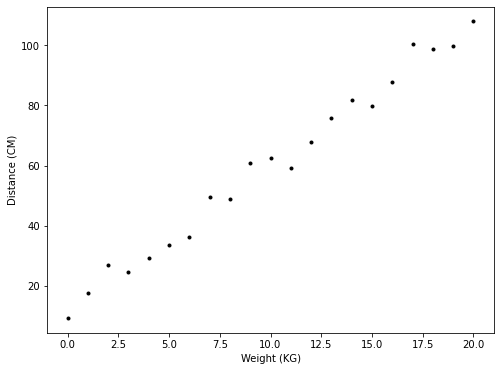

In [2]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

# plotting the data
plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

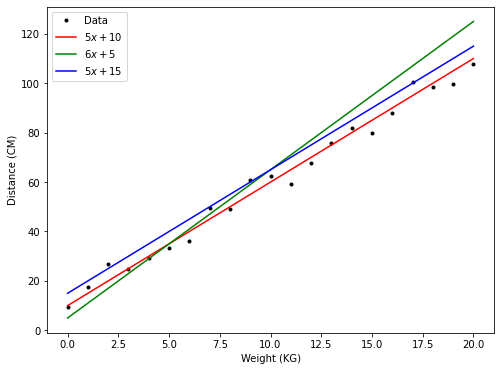

In [3]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

The absolute value function uses the following formula:  
$$\mid y_i - m x_i - c \mid$$

In [4]:
# Calculate the absolute cost value for the data above
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c) for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, abs(cost(5.0, 10.0))))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, abs(cost(6.0,  5.0))))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, abs(cost(5.0, 15.0))))

Cost with m =  5.00 and c = 10.00:     1.74
Cost with m =  6.00 and c =  5.00:   106.74
Cost with m =  5.00 and c = 15.00:   106.74


NOTE: this is where my attempt at the exercise really starts

In [5]:
# creating a list to store each result of the absolute value function (not summed)
abs_values = []

# seting m & c values based on Ian's example
m, c = 5.00, 10.00 

# iterate through arrays to calculate cost, and append each result to abs_values
for i in range(w.size):
    result = (d[i] - m * w[i] - c)
    abs_values.append(result)
    
abs_values

[-0.6898273877837813,
 2.4873001236554657,
 6.845568706294301,
 -0.23209863177882895,
 -0.8243136233841746,
 -1.4994984874950958,
 -3.8326854380927458,
 4.491934549021124,
 -0.9543628343121071,
 5.993599413421691,
 2.627758988228493,
 -5.704595071480348,
 -2.2528206961473245,
 0.7670381493212943,
 1.973362828069611,
 -5.291175087100214,
 -2.242508039141441,
 5.345427542170043,
 -1.3650392366725725,
 -5.3312332114005585,
 -2.055199070594938]

In [6]:
# confirming this produces the same sum as above
np.sum(abs_values)

-1.7433665152021067

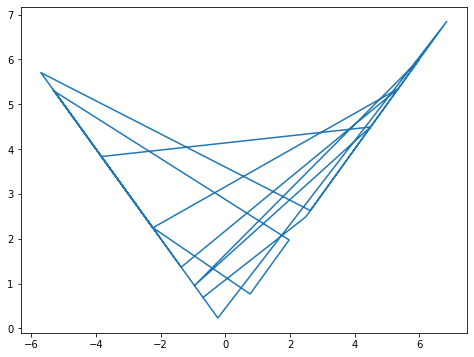

In [7]:
# first attempt at plotting those values against the absolute values - expecting this to be v-shaped
# https://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.absolute.html
plt.plot(abs_values, np.abs(abs_values))
plt.show()

In [8]:
# that looks a bit messy - let's try sorting the list of results and plotting again
abs_values.sort()

# checking what the list looks like now
abs_values

[-5.704595071480348,
 -5.3312332114005585,
 -5.291175087100214,
 -3.8326854380927458,
 -2.2528206961473245,
 -2.242508039141441,
 -2.055199070594938,
 -1.4994984874950958,
 -1.3650392366725725,
 -0.9543628343121071,
 -0.8243136233841746,
 -0.6898273877837813,
 -0.23209863177882895,
 0.7670381493212943,
 1.973362828069611,
 2.4873001236554657,
 2.627758988228493,
 4.491934549021124,
 5.345427542170043,
 5.993599413421691,
 6.845568706294301]

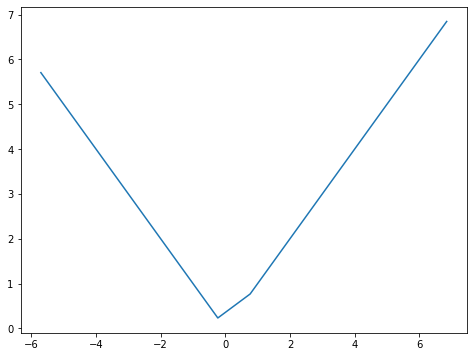

In [9]:
# now lets plot those values vs. the absolute values again
plt.plot(abs_values, np.abs(abs_values))
plt.show()

<br>

*__(ii) Research and explain why the absolute value function is not typically used in fitting straight lines to data.__*

According to https://www.bradthiessen.com/html5/docs/ols.pdf:  
Mathematical difficulties: "When we do not square all the values in the numerator, the positive and negative values cancel each other out and we’re always left with a value of 0", especially when using a normal distribution

From https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia:  
"I suppose you could say that absolute difference assigns equal weight to the spread of data whereas squaring emphasises the extremes. Technically though, as others have pointed out, squaring makes the algebra much easier to work with and offers properties that the absolute method does not (for example, the variance is equal to the expected value of the square of the distribution minus the square of the mean of the distribution)"

From https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia:  
"Having a square as opposed to the absolute value function gives a nice continuous and differentiable function (absolute value is not differentiable at 0) - which makes it the natural choice, especially in the context of estimation and regression analysis."

In summary, the absolute value function is not typically used for a number of reasons. These include the mathematical difficulties it poses, for example where the positive and negative values in a normal distribution essentially cancel each other out resulting in a value of zero (which is not differentiable and creates more problems), while squaring also makes the algebraic calculations easier to work with. Additionally, squaring values makes it easier to identify any extreme cases in the data compared to using the absolute value.

<br>

***
## Exercise 2.2

*__(i) Fit a straight line to the following data points, using all three methods used above.__*

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

<br>

#### Method 1: Plotting the Best Fit Line

In [10]:
# setting x & y values as per the instructions
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

# kept getting type errors when plotting line, converting to np array seemed to fix them
# https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
x = np.asarray(x)
y = np.asarray(y)

In [11]:
# calculating best values for m & c & storing them in a var
best_fit = np.polyfit(x, y, 1)

# setting values for m & c as per index position in best_fit var
m = float(best_fit[0])
c = float(best_fit[1])

# testing values - should be roughly 0.10315 & 1.04947 respectively
m, c

(0.10315789473684217, 1.0494736842105254)

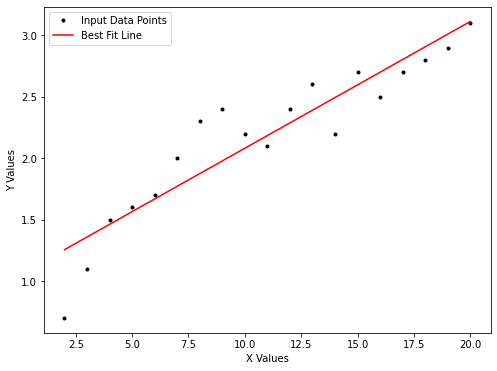

In [12]:
# Plotting the best fit line
plt.plot(x, y, 'k.', label='Input Data Points')
plt.plot(x, m * x + c, 'r-', label='Best Fit Line')

# Adding axis labels and legend
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()

# Show the plot
plt.show()

<br>

#### Method 2: Plotting the Line Using Optimization

In [13]:
# Most of this code was adapted from Ian's notebook

# Scipy Optimization
import scipy.optimize as so

In [14]:
def cost(MC):
    # Unpack the values m and c
    m, c = MC
    
    # We need the data points in this function
    cost = np.sum((y - m * x - c)**2)
    
    # Return that value
    return cost

In [15]:
# Run a quick test (based on previous values of m & c calculated for best fit line)
cost((0.1031, 1.0494))

1.0395904499999997

In [16]:
# minimize the cost
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))

# Show the results - note we get pretty much the same values as we did in the best fit example
result

      fun: 1.03957894736911
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([1.49011612e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [17]:
# Extract the optimized values of m and c
m_o, c_o = result.x

# Print them
m_o, c_o

(0.10315785999003411, 1.0494740589312146)

In [18]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)

# Print analytical results to show how similar they are to the optimized results
m_a, c_a

(0.10315789473684217, 1.0494736842105254)

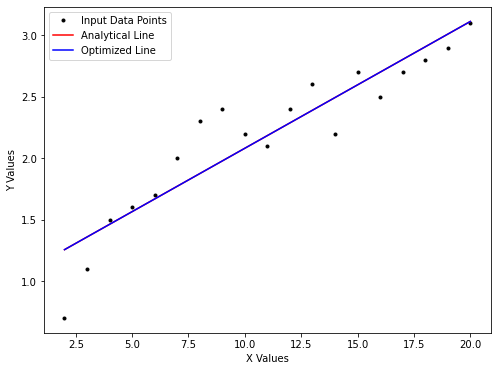

In [19]:
# Plot the best fit line & line from the optimization
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Input Data Points')
ax.plot(x, m_a * x + c_a, 'r-', label='Analytical Line')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized Line')


plt.xlabel('X Values')
plt.ylabel('Y Values')
ax.legend()

# Show the plot - note that the red (analytical) line is covered the blue (optimized) line as they are so similar
plt.show()

<br>

#### Method 3: Plotting the Line Using Curve Fitting

In [20]:
# Again, this is mainly based on Ian's notebook with minor changes

# Create the model function
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

def f(x, m, c):
    return m * x + c

In [21]:
# Run curve_fit method
result = so.curve_fit(f, x, y)

# Look at the result - again it's very similr to the values for m & c previously calculated
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [22]:
# Pull out the parameters
m_f, c_f = result[0]

# Print values
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

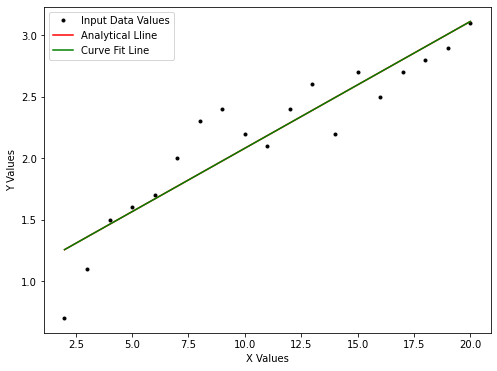

In [23]:
# Plot the best fit line & curve fit line on the same plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Input Data Values')
ax.plot(x, m_a * x + c_a, 'r-', label='Analytical Lline')
ax.plot(x, m_f * x + c_f, 'g-', label='Curve Fit Line')

plt.xlabel('X Values')
plt.ylabel('Y Values')
ax.legend()

# Show the plot - again we can see that one line (the red analytical one this time) 
# is covered by the green (curve fit) one as they are so similar
plt.show()

<br>

*__(ii) Do you think a straight line is a good model for these points?__*

Looking at the line(s) in the plots above, it looks like a few of the points are on or almost on the line. Also there seems to be an equal or almost equal amount of points both above and below the line. So yes, I think a straight line is a good enough model for these particular points.

<br>

# End
***